## Analysis of MLB Game Logs with data from 2012 to 2016

### What factors are most associated with wins?

#### Game Attributes:
 - Length
 - Location (Home v. Away)
 - Series

#### Team Performance:
 - Performance stats
 - Pitcher
 - Manager

#### Other Factors:
 - Time
 - Attendance
 - Weather (not analyzed)
 
This analysis will identify the factors most associated with wins during the period 2012 to 2016 and compare team performance statistics against the following variables: (1) Game Location, Home or Away; (2) Game Time, Day or Night; (3) Game Length in Minutes; and (4) Game Attendance.

In [212]:
#Import libraries for analysis
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import os
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)

In [213]:
#Import dataset for analysis
os.chdir('/Users/jjnajera/Downloads')
df_gamelogs = pd.read_csv('game_logs_cleaned.csv', parse_dates=['date'], 
                          dtype = {'day_night':'str', 'length_minutes':'int'})

## Data Cleansing
The original dataset contained 171,907 rows and 161 columns with data from 1871 to 2016. Prior to import, rows containing data for the years 1871 through 1999 were deleted, as well as 119 columns with data irrelevant to the analysis.
The dataset imported for analysis has 41,298 rows and 42 columns.

In [214]:
#Display 
df_gamelogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41298 entries, 0 to 41297
Data columns (total 42 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             41298 non-null  datetime64[ns]
 1   number_of_game   41298 non-null  int64         
 2   day_of_week      41298 non-null  object        
 3   v_name           41298 non-null  object        
 4   v_league         41298 non-null  object        
 5   v_game_number    41298 non-null  int64         
 6   h_name           41298 non-null  object        
 7   h_league         41298 non-null  object        
 8   h_game_number    41298 non-null  int64         
 9   v_score          41298 non-null  int64         
 10  h_score          41298 non-null  int64         
 11  length_outs      41298 non-null  int64         
 12  day_night        41298 non-null  object        
 13  park_id          41298 non-null  object        
 14  attendance       41296 non-null  float

In [215]:
#Add column - year
df_gamelogs['year'] = df_gamelogs.date.dt.year

#Add columns - visitor wins, home wins
df_gamelogs['visitor wins'] = df_gamelogs['v_score'] > df_gamelogs['h_score']
df_gamelogs['home wins'] = df_gamelogs['v_score'] < df_gamelogs['h_score']



In [216]:
#Create dataframe df_gamelogs5 to include only data from 2012 to 2016
years = [2012, 2013, 2014, 2015, 2016]
df_gamelogs5 = df_gamelogs[df_gamelogs.year.isin(years)]

#Create dataframe visitor_wins to contain only 'visitor wins' == True
df_v_wins = df_gamelogs5[df_gamelogs5['visitor wins'] == True]

#Create dataframe home_wins to contain only 'visitor wins' == False
df_h_wins = df_gamelogs5[df_gamelogs5['visitor wins'] == False]

In [217]:
df_v_wins.describe()

,number_of_game,v_game_number,h_game_number,v_score,h_score,length_outs,attendance,length_minutes,v_at_bats,v_hits,...,h_homeruns,h_rbi,h_walks,h_strikeouts,h_stolen_bases,h_pitchers_used,h_errors,h_double_plays,h_triple_plays,year
count,5654.000000,5654.000000,5654.000000,5654.000000,5654.000000,5654.000000,5654.000000,5654.000000,5654.000000,5654.000000,...,5654.000000,5654.000000,5654.000000,5654.000000,5654.000000,5654.000000,5654.000000,5654.000000,5654.000000,5654.000000
mean,0.030952,80.874425,80.889282,6.117793,2.661655,55.255394,30041.234524,188.817297,36.495048,10.427485,...,0.680934,2.529713,2.682879,8.084719,0.441811,4.411036,0.726388,0.908914,0.000707,2013.999823
std,0.226333,47.089357,47.081775,2.993287,2.036451,5.155210,9861.259530,28.277041,4.436141,3.427802,...,0.844374,1.978771,1.862817,2.965347,0.785319,1.325681,0.889998,0.920326,0.026591,1.416151
min,0.000000,1.000000,1.000000,1.000000,0.000000,30.000000,0.000000,101.000000,17.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2012.000000
25%,0.000000,40.000000,40.000000,4.000000,1.000000,54.000000,22271.500000,171.000000,34.000000,8.000000,...,0.000000,1.000000,1.000000,6.000000,0.000000,4.000000,0.000000,0.000000,0.000000,2013.000000
50%,0.000000,80.000000,80.000000,6.000000,2.000000,54.000000,30362.000000,185.000000,36.000000,10.000000,...,0.000000,2.000000,2.000000,8.000000,0.000000,4.000000,1.000000,1.000000,0.000000,2014.000000
75%,0.000000,122.000000,122.000000,8.000000,4.000000,54.000000,37840.750000,202.000000,39.000000,13.000000,...,1.000000,4.000000,4.000000,10.000000,1.000000,5.000000,1.000000,1.000000,0.000000,2015.000000
max,2.000000,163.000000,163.000000,21.000000,13.000000,120.000000,56000.000000,426.000000,72.000000,26.000000,...,7.000000,13.000000,13.000000,23.000000,7.000000,12.000000,7.000000,6.000000,1.000000,2016.000000


In [218]:
df_h_wins.describe()

,number_of_game,v_game_number,h_game_number,v_score,h_score,length_outs,attendance,length_minutes,v_at_bats,v_hits,...,h_homeruns,h_rbi,h_walks,h_strikeouts,h_stolen_bases,h_pitchers_used,h_errors,h_double_plays,h_triple_plays,year
count,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000,6492.000000,6494.000000,6494.000000,6494.000000,...,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000
mean,0.027102,82.020942,82.006160,2.526948,5.755313,52.293656,30753.512169,178.974284,33.452726,7.206344,...,1.277641,5.479058,3.370650,6.736988,0.684786,3.890514,0.460579,0.900832,0.001386,2013.999230
std,0.209592,46.466204,46.473792,1.943638,2.870537,5.090207,9932.326462,27.813328,4.002405,2.856318,...,1.146339,2.819446,2.007565,2.679639,0.950634,1.406852,0.705243,0.915171,0.037205,1.412524
min,0.000000,1.000000,1.000000,0.000000,1.000000,27.000000,0.000000,75.000000,18.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2012.000000
25%,0.000000,42.000000,42.000000,1.000000,4.000000,51.000000,22946.000000,161.000000,31.000000,5.000000,...,0.000000,3.000000,2.000000,5.000000,0.000000,3.000000,0.000000,0.000000,0.000000,2013.000000
50%,0.000000,83.000000,82.000000,2.000000,5.000000,51.000000,31247.000000,175.000000,33.000000,7.000000,...,1.000000,5.000000,3.000000,7.000000,0.000000,4.000000,0.000000,1.000000,0.000000,2014.000000
75%,0.000000,122.000000,122.000000,4.000000,7.000000,51.000000,38884.250000,192.000000,35.000000,9.000000,...,2.000000,7.000000,5.000000,8.000000,1.000000,5.000000,1.000000,1.000000,0.000000,2015.000000
max,2.000000,162.000000,162.000000,13.000000,22.000000,113.000000,56000.000000,414.000000,76.000000,22.000000,...,8.000000,22.000000,14.000000,21.000000,8.000000,11.000000,5.000000,6.000000,1.000000,2016.000000


In [219]:
#Count number of times each team appears in df_v_wins
v_win_frequency = df_v_wins['v_name'].value_counts()
print(v_win_frequency.head())

#Team names: WAS - Washington Nationals; SLN - St. Louis Cardinals; LAN - Los Angeles Dodgers; 
#TEX - Texas Rangers; SFN - San Francisco Giants

WAS    214
SLN    213
LAN    210
TEX    209
SFN    203
Name: v_name, dtype: int64


In [220]:
#Count number of times each team appears in df_h_wins
h_win_frequency = df_h_wins['h_name'].value_counts()
print(h_win_frequency.head())

#Team names: SLN - St. Louis Cardinals; LAN - Los Angeles Dodgers; WAS - Washington Nationals;
#BAL - Baltimore Orioles; PIT - Pittsburgh Pirates

SLN    248
LAN    245
WAS    244
BAL    242
PIT    238
Name: h_name, dtype: int64


In [221]:
#Create a regression model that shows which team performance statistics are most associated with winning.

#Establish two dataframes, independent_variables and dependent_variable
independent_variables = df_gamelogs5[['v_homeruns','v_rbi','v_strikeouts','v_stolen_bases','v_errors',
                    'v_at_bats','v_hits','v_walks','h_homeruns','h_rbi','h_strikeouts','h_stolen_bases','h_errors',
                    'h_at_bats','h_hits','h_walks']]
dependent_variable = df_gamelogs5['visitor wins']

#Add a constant to independent_variables
independent_variables = sm.add_constant(independent_variables)

#Store and fit the model
regression_model_all = sm.OLS(dependent_variable,independent_variables).fit()

#Print regression_model_v.summary() to view the Regression Statistics
regression_model_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           visitor wins   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     1761.
Date:                Sat, 19 Jun 2021   Prob (F-statistic):               0.00
Time:                        12:16:15   Log-Likelihood:                -1494.1
No. Observations:               12148   AIC:                             3022.
Df Residuals:                   12131   BIC:                             3148.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2958      0.026     11.436      0.000       0.245       0.347
v_homeruns         0.0128      0.003      4.362      0.000       0.007       0.019
v_rbi              0.0792      0.002     48.305      0.000       0.076       0.082
v_strikeouts      -0.0006      0.001     -0.687      0.492      -0.002       0.001
v_stolen_bases     0.0174      0.003      5.881      0.000       0.012       0.023
v_errors          -0.0539      0.003    -16.634      0.000      -0.060      -0.048
v_at_bats         -0.0587      0.001    -40.240      0.000      -0.062      -0.056
v_hits             0.0497      0.002     28.169      0.000       0.046       0.053
v_walks           -0.0049      0.001     -3.457      0.001      -0.008      -0.002
h_homeruns        -0.0143      0.003     -4.887      0.000      -0.020      -0.009
h_rbi             -0.0691      0.002    -41.820      0.000      -0.072      -0.066
h_strikeouts       0.0014      0.001      1.514      0.130      -0.000       0.003
h_stolen_bases    -0.0167      0.003     -5.781      0.000      -0.022      -0.011
h_errors           0.0445      0.003     13.650      0.000       0.038       0.051
h_at_bats          0.0694      0.001     51.765      0.000       0.067       0.072
h_hits            -0.0631      0.002    -37.174      0.000      -0.066      -0.060
h_walks           -0.0003      0.001     -0.200      0.842      -0.003       0.002
==============================================================================
Omnibus:                      233.432   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.637
Skew:                          -0.067   Prob(JB):                     1.58e-29
Kurtosis:                       2.506   Cond. No.                         540.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [239]:
#Extract the Coefficients from regression_model_all
Coefficients_all = regression_model_all.params
print(Coefficients_all)

const             0.295842
v_homeruns        0.012778
v_rbi             0.079206
v_strikeouts     -0.000633
v_stolen_bases    0.017430
v_errors         -0.053936
v_at_bats        -0.058736
v_hits            0.049696
v_walks          -0.004914
h_homeruns       -0.014332
h_rbi            -0.069060
h_strikeouts      0.001449
h_stolen_bases   -0.016749
h_errors          0.044487
h_at_bats         0.069446
h_hits           -0.063144
h_walks          -0.000279
dtype: float64


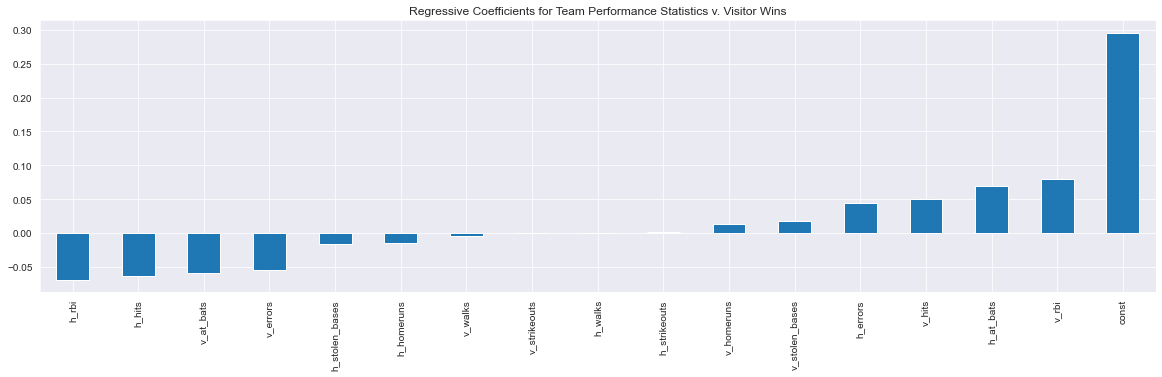

In [240]:
#Create a bar plot to identify which Coefficients react most strongly with respect to Visitor Wins
Coefficients_all.sort_values().plot(kind='bar')
plt.title('Regressive Coefficients for Team Performance Statistics v. Visitor Wins')
plt.show()

In [222]:
#Create a regression model that shows which visiting team performance statistics are most associated with winning.

#Establish two dataframes, independent_variables and dependent_variable
independent_variables = df_gamelogs5[['v_homeruns','v_rbi','v_strikeouts','v_stolen_bases','v_errors',
                    'v_at_bats','v_hits','v_walks']]
dependent_variable = df_gamelogs5['visitor wins']

#Add a constant to independent_variables
independent_variables = sm.add_constant(independent_variables)

#Store and fit the model
regression_model_v = sm.OLS(dependent_variable,independent_variables).fit()

#Print regression_model_v.summary() to view the Regression Statistics
regression_model_v.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           visitor wins   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     834.2
Date:                Sat, 19 Jun 2021   Prob (F-statistic):               0.00
Time:                        12:16:15   Log-Likelihood:                -6126.8
No. Observations:               12148   AIC:                         1.227e+04
Df Residuals:                   12139   BIC:                         1.234e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2045      0.037      5.568      0.000       0.132       0.276
v_homeruns         0.0093      0.004      2.187      0.029       0.001       0.018
v_rbi              0.0852      0.002     36.054      0.000       0.081       0.090
v_strikeouts      -0.0039      0.001     -2.911      0.004      -0.007      -0.001
v_stolen_bases     0.0450      0.004     10.446      0.000       0.037       0.053
v_errors          -0.0732      0.005    -16.106      0.000      -0.082      -0.064
v_at_bats         -0.0045      0.001     -3.090      0.002      -0.007      -0.002
v_hits             0.0088      0.002      3.843      0.000       0.004       0.013
v_walks            0.0138      0.002      6.779      0.000       0.010       0.018
==============================================================================
Omnibus:                     1679.530   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              499.163
Skew:                           0.220   Prob(JB):                    4.06e-109
Kurtosis:                       2.110   Cond. No.                         380.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [223]:
#Extract the Coefficients from regression_model_v
Coefficients_v = regression_model_v.params
print(Coefficients_v)

const             0.204486
v_homeruns        0.009319
v_rbi             0.085168
v_strikeouts     -0.003906
v_stolen_bases    0.045024
v_errors         -0.073163
v_at_bats        -0.004482
v_hits            0.008845
v_walks           0.013835
dtype: float64


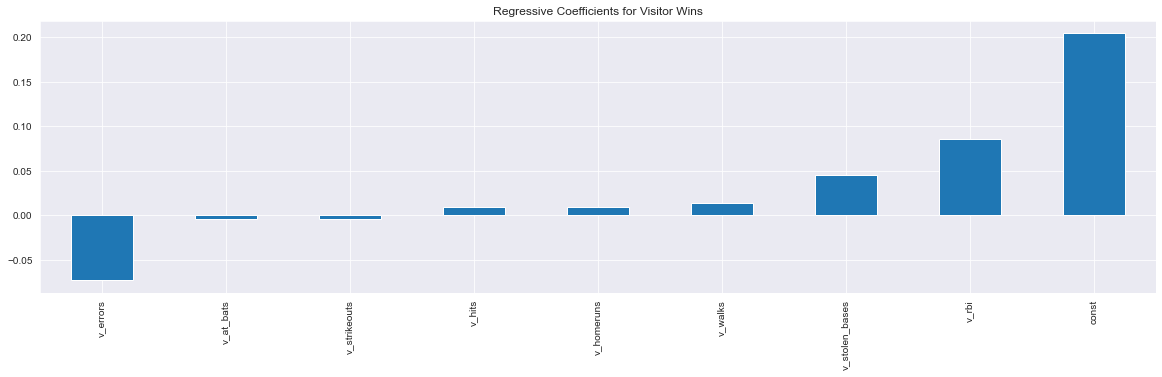

In [224]:
#Create a bar plot to identify which Coefficients react most strongly with respect to Visitor Wins
Coefficients_v.sort_values().plot(kind='bar')
plt.title('Regressive Coefficients for Visitor Wins')
plt.show()

In [225]:
#Create a regression model that shows which home team performance statistics are most associated with winning.

#Establish two dataframes, independent_variables and dependent_variable
independent_variables = df_gamelogs5[['h_homeruns','h_rbi','h_strikeouts','h_stolen_bases','h_errors',
                    'h_at_bats','h_hits','h_walks']]
dependent_variable = df_gamelogs5['visitor wins']

#Add a constant to independent_variables
independent_variables = sm.add_constant(independent_variables)

#Store and fit the model
regression_model_h = sm.OLS(dependent_variable,independent_variables).fit()

#Print regression_model_h.summary() to view the Regression Statistics
regression_model_h.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           visitor wins   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     1047.
Date:                Sat, 19 Jun 2021   Prob (F-statistic):               0.00
Time:                        12:16:15   Log-Likelihood:                -5599.6
No. Observations:               12148   AIC:                         1.122e+04
Df Residuals:                   12139   BIC:                         1.128e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.6044      0.030    -19.835      0.000      -0.664      -0.545
h_homeruns        -0.0102      0.004     -2.495      0.013      -0.018      -0.002
h_rbi             -0.0670      0.002    -29.372      0.000      -0.072      -0.063
h_strikeouts       0.0047      0.001      3.516      0.000       0.002       0.007
h_stolen_bases    -0.0425      0.004    -10.571      0.000      -0.050      -0.035
h_errors           0.0706      0.004     16.243      0.000       0.062       0.079
h_at_bats          0.0538      0.001     42.939      0.000       0.051       0.056
h_hits            -0.0518      0.002    -24.198      0.000      -0.056      -0.048
h_walks           -0.0142      0.002     -7.397      0.000      -0.018      -0.010
==============================================================================
Omnibus:                      208.684   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.305
Skew:                          -0.329   Prob(JB):                     2.39e-48
Kurtosis:                       2.961   Cond. No.                         315.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [226]:
#Extract the Coefficients from regression_model_h
Coefficients_h = regression_model_h.params
print(Coefficients_h)

const            -0.604412
h_homeruns       -0.010193
h_rbi            -0.067045
h_strikeouts      0.004700
h_stolen_bases   -0.042533
h_errors          0.070585
h_at_bats         0.053845
h_hits           -0.051830
h_walks          -0.014207
dtype: float64


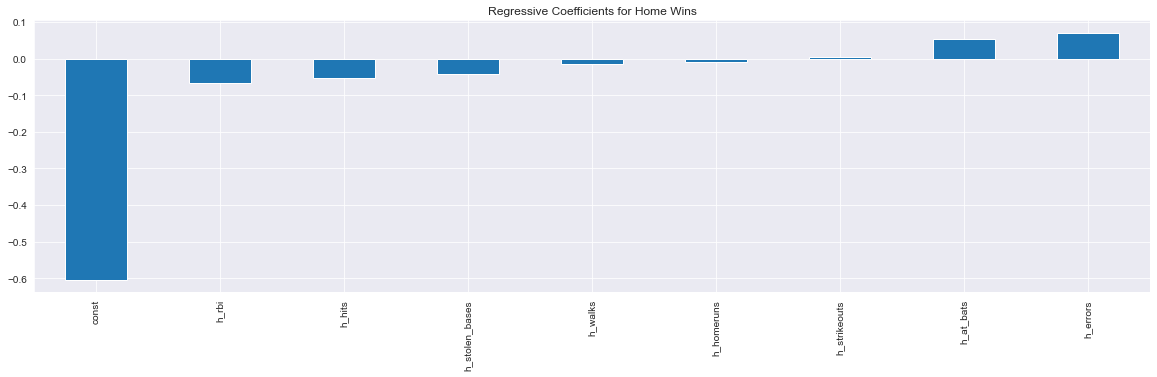

In [227]:
#Create a bar plot to identify which Coefficients react most strongly with respect to Home Wins
Coefficients_h.sort_values().plot(kind='bar')
plt.title('Regressive Coefficients for Home Wins')
plt.show()

#### (1) Game Location, Home or Away

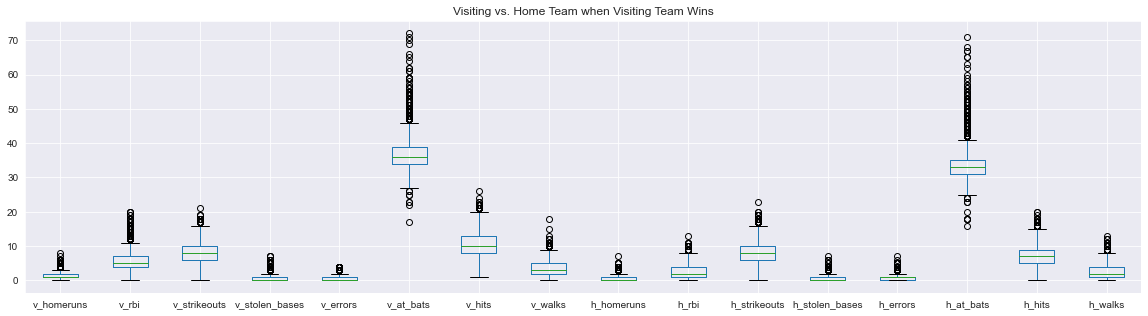

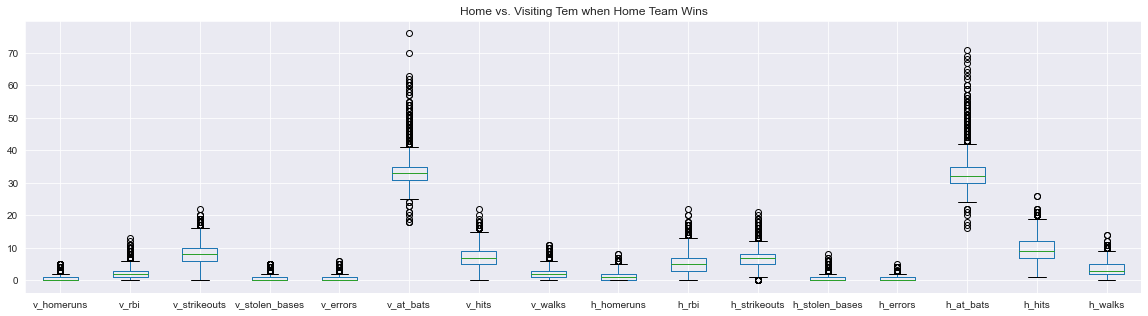

In [228]:
#Create a boxplot using df_v_wins
df_v_wins.boxplot(column=['v_homeruns','v_rbi','v_strikeouts','v_stolen_bases','v_errors',
                    'v_at_bats','v_hits','v_walks','h_homeruns','h_rbi','h_strikeouts','h_stolen_bases','h_errors',
                    'h_at_bats','h_hits','h_walks'])
plt.title('Visiting vs. Home Team when Visiting Team Wins')
plt.show()

#Create a boxplot using df_h_wins
df_h_wins.boxplot(column=['v_homeruns','v_rbi','v_strikeouts','v_stolen_bases','v_errors',
                    'v_at_bats','v_hits','v_walks','h_homeruns','h_rbi','h_strikeouts','h_stolen_bases','h_errors',
                    'h_at_bats','h_hits','h_walks'])
plt.title('Visiting vs. Home Team when Home Team Wins')
plt.show()

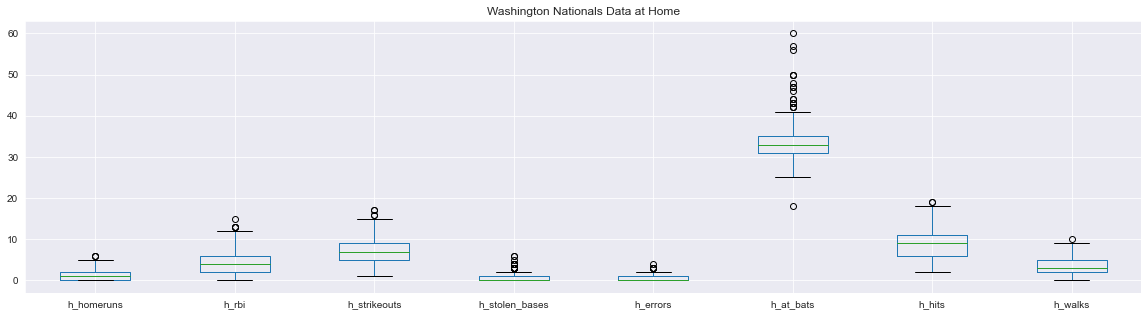

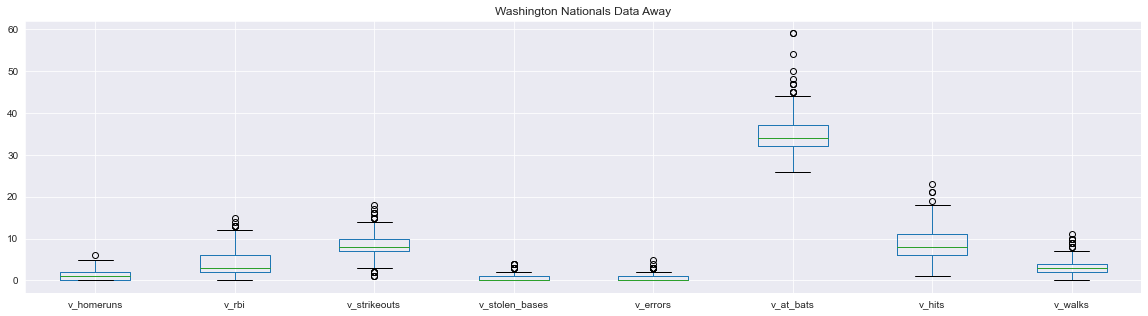

In [229]:
#Create a boxplot of the data for WAS when they are the home team
WAS_h = df_gamelogs5['h_name'] == 'WAS'

df_gamelogs5_WAS_h = df_gamelogs5[WAS_h]
df_gamelogs5_WAS_h.boxplot(column=['h_homeruns','h_rbi','h_strikeouts','h_stolen_bases','h_errors',
                    'h_at_bats','h_hits','h_walks'])
plt.title('Washington Nationals Data at Home')
plt.show()

#Create a boxplot of the data for WAS when they are the visitor team
WAS_v = df_gamelogs5['v_name'] == 'WAS'

df_gamelogs5_WAS_v = df_gamelogs5[WAS_v]
df_gamelogs5_WAS_v.boxplot(column= ['v_homeruns','v_rbi','v_strikeouts','v_stolen_bases','v_errors',
                    'v_at_bats','v_hits','v_walks'])
plt.title('Washington Nationals Data Away')
plt.show()

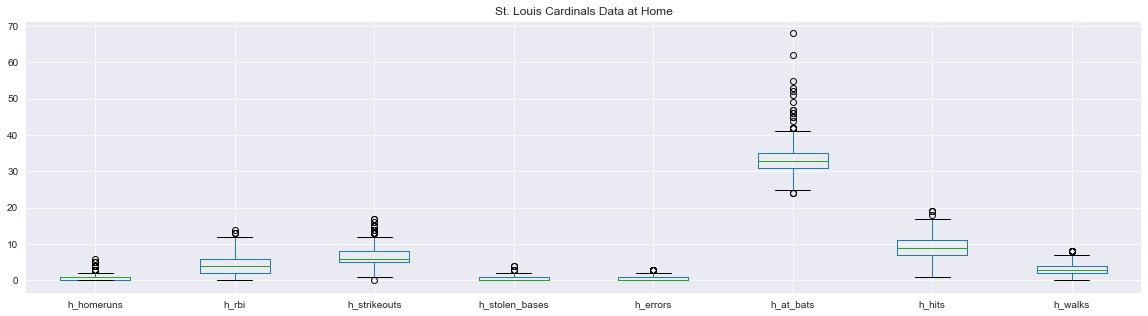

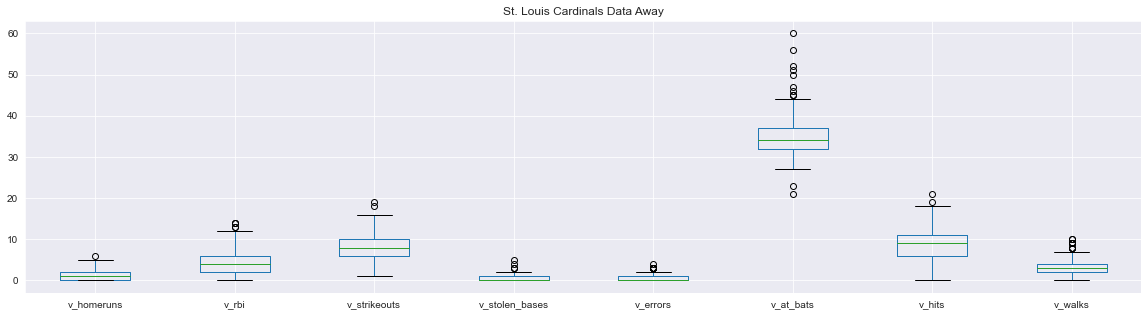

In [230]:
#Create a boxplot of the data for SLN when they are the home team
SLN_h = df_gamelogs5['h_name'] == 'SLN'

df_gamelogs5_SLN_h = df_gamelogs5[SLN_h]
df_gamelogs5_SLN_h.boxplot(column=['h_homeruns','h_rbi','h_strikeouts','h_stolen_bases','h_errors',
                    'h_at_bats','h_hits','h_walks'])
plt.title('St. Louis Cardinals Data at Home')
plt.show()

#Create a boxplot of the data for SLN when they are the visitor team
SLN_v = df_gamelogs5['v_name'] == 'SLN'

df_gamelogs5_SLN_v = df_gamelogs5[SLN_v]
df_gamelogs5_SLN_v.boxplot(column= ['v_homeruns','v_rbi','v_strikeouts','v_stolen_bases','v_errors',
                    'v_at_bats','v_hits','v_walks'])
plt.title('St. Louis Cardinals Data Away')
plt.show()

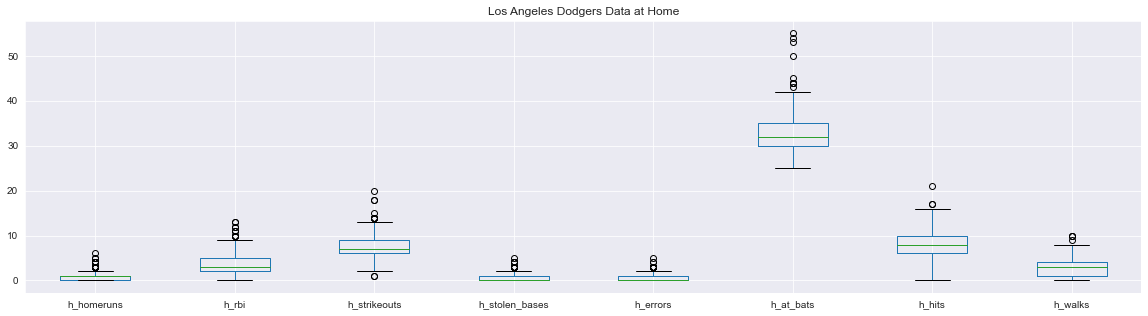

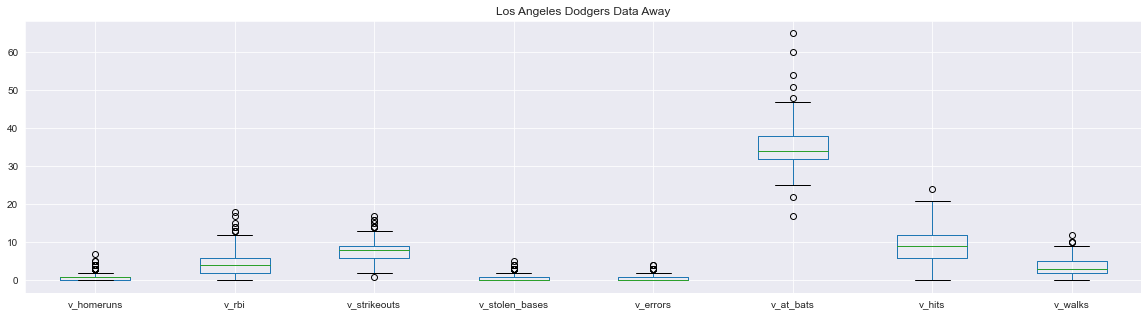

In [231]:
#Create a boxplot of the data for LAN when they are the home team
LAN_h = df_gamelogs5['h_name'] == 'LAN'

df_gamelogs5_LAN_h = df_gamelogs5[LAN_h]
df_gamelogs5_LAN_h.boxplot(column=['h_homeruns','h_rbi','h_strikeouts','h_stolen_bases','h_errors',
                    'h_at_bats','h_hits','h_walks'])
plt.title('Los Angeles Dodgers Data at Home')
plt.show()

#Create a boxplot of the data for SLN when they are the visitor team
LAN_v = df_gamelogs5['v_name'] == 'LAN'

df_gamelogs5_LAN_v = df_gamelogs5[LAN_v]
df_gamelogs5_LAN_v.boxplot(column= ['v_homeruns','v_rbi','v_strikeouts','v_stolen_bases','v_errors',
                    'v_at_bats','v_hits','v_walks'])
plt.title('Los Angeles Dodgers Data Away')
plt.show()

In [232]:
#Create a correlated dataframe using the df_gamelogs5 dataset
game_stats = df_gamelogs5[['v_homeruns','v_rbi','v_strikeouts','v_stolen_bases','v_errors',
                    'v_at_bats','v_hits','v_walks','h_homeruns','h_rbi','h_strikeouts','h_stolen_bases','h_errors',
                    'h_at_bats','h_hits','h_walks']]

corr_game_stats = game_stats.corr()

<AxesSubplot:>

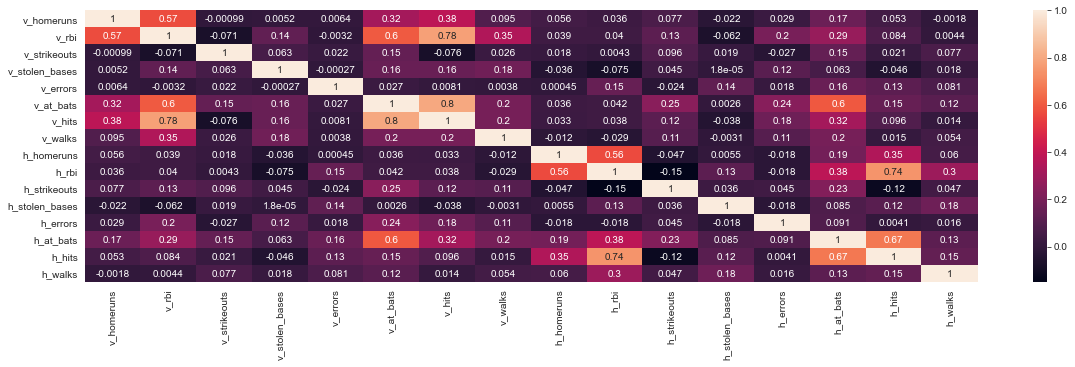

In [233]:
#Create a heatmap to show correlations (R) for all team performance variables using the df_gamelogs5 dataset
sns.heatmap(corr_game_stats, annot=True)

#### (2) Game Time, Day or Night

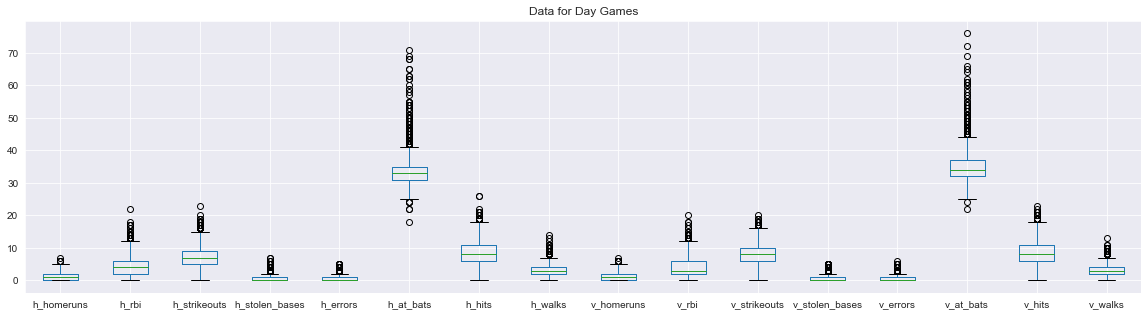

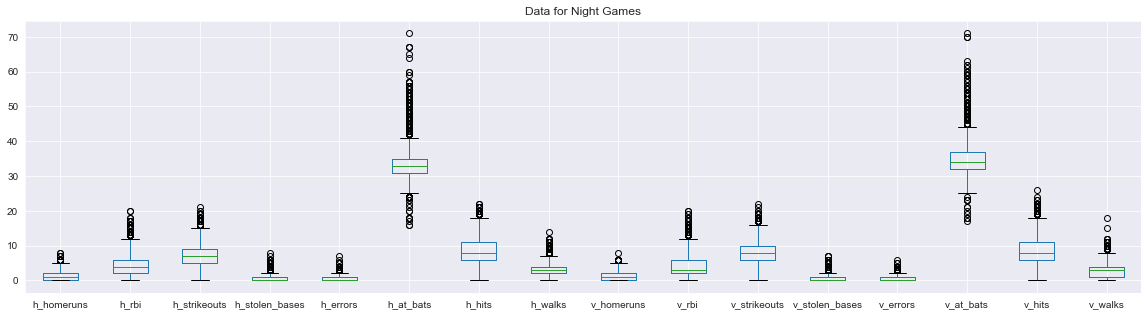

In [234]:
#Create a boxplot of the data for games that take place during the day
day_games = df_gamelogs5['day_night'] == 'D'

df_gamelogs5_day_games = df_gamelogs5[day_games]
df_gamelogs5_day_games.boxplot(column=['h_homeruns','h_rbi','h_strikeouts','h_stolen_bases','h_errors',
                    'h_at_bats','h_hits','h_walks','v_homeruns','v_rbi','v_strikeouts','v_stolen_bases','v_errors',
                    'v_at_bats','v_hits','v_walks'])
plt.title('Data for Day Games')
plt.show()

#Create a boxplot of the data for games that take place at night
night_games = df_gamelogs5['day_night'] == 'N'

df_gamelogs5_night_games = df_gamelogs5[night_games]
df_gamelogs5_night_games.boxplot(column=['h_homeruns','h_rbi','h_strikeouts','h_stolen_bases','h_errors',
                    'h_at_bats','h_hits','h_walks','v_homeruns','v_rbi','v_strikeouts','v_stolen_bases','v_errors',
                    'v_at_bats','v_hits','v_walks'])
plt.title('Data for Night Games')
plt.show()

In [251]:
#Create a correlated dataframe for games that take place during the day
day_games = df_gamelogs5['day_night'] == 'D'
day_games = df_gamelogs5[day_games]
day_games = day_games[['v_homeruns','v_rbi','v_strikeouts','v_stolen_bases','v_errors',
                    'v_at_bats','v_hits','v_walks','h_homeruns','h_rbi','h_strikeouts','h_stolen_bases','h_errors',
                    'h_at_bats','h_hits','h_walks','day_night']]
corr_day_games = day_games.corr()

<AxesSubplot:>

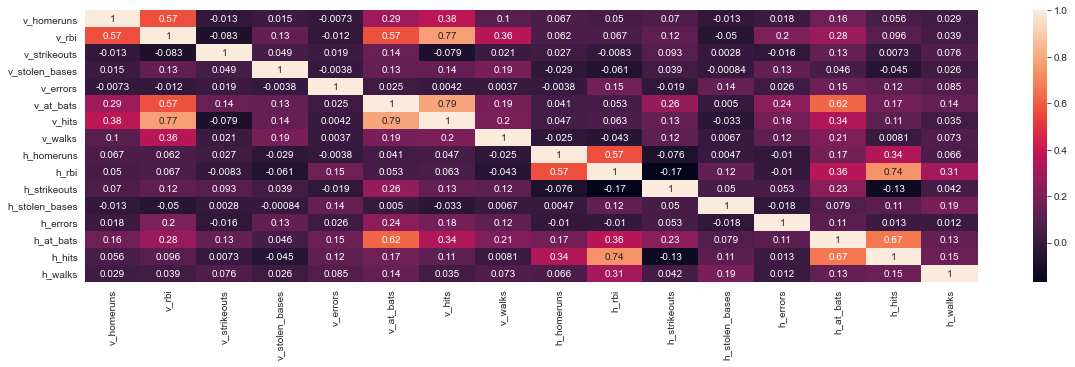

In [252]:
#Create a heatmap to show correlations (R) for all team performance variables with day games
sns.heatmap(corr_day_games, annot=True)

In [253]:
#Create a correlated dataframe for games that take place at night
night_games = df_gamelogs5['day_night'] == 'N'
night_games = df_gamelogs5[night_games]
night_games = night_games[['v_homeruns','v_rbi','v_strikeouts','v_stolen_bases','v_errors',
                    'v_at_bats','v_hits','v_walks','h_homeruns','h_rbi','h_strikeouts','h_stolen_bases','h_errors',
                    'h_at_bats','h_hits','h_walks','day_night']]
corr_night_games = night_games.corr()

<AxesSubplot:>

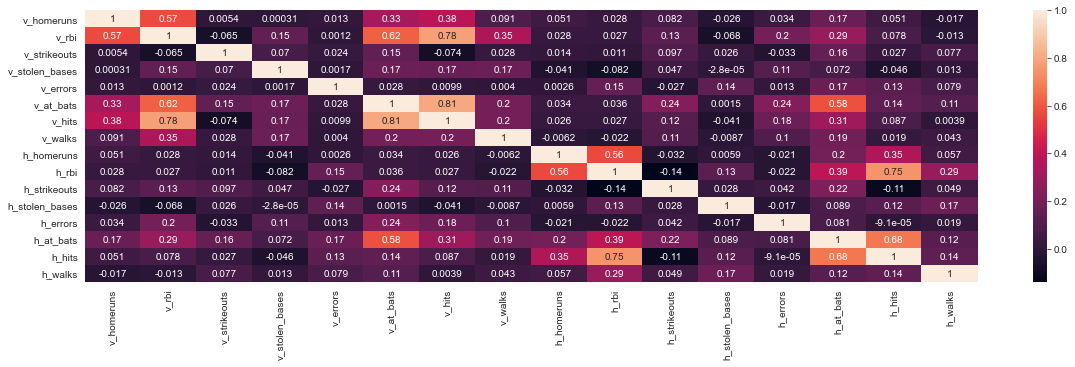

In [254]:
#Create a heatmap to show correlations (R) for all team performance variables with night games
sns.heatmap(corr_night_games, annot=True)

#### (3) Game Length in Minutes

In [235]:
#Create a correlated dataframe using the df_gamelogs5 dataset
game_stats_length = df_gamelogs5[['v_homeruns','v_rbi','v_strikeouts','v_stolen_bases','v_errors',
                    'v_at_bats','v_hits','v_walks','h_homeruns','h_rbi','h_strikeouts','h_stolen_bases','h_errors',
                    'h_at_bats','h_hits','h_walks','length_minutes']]

corr_game_stats_length = game_stats_length.corr()

<AxesSubplot:>

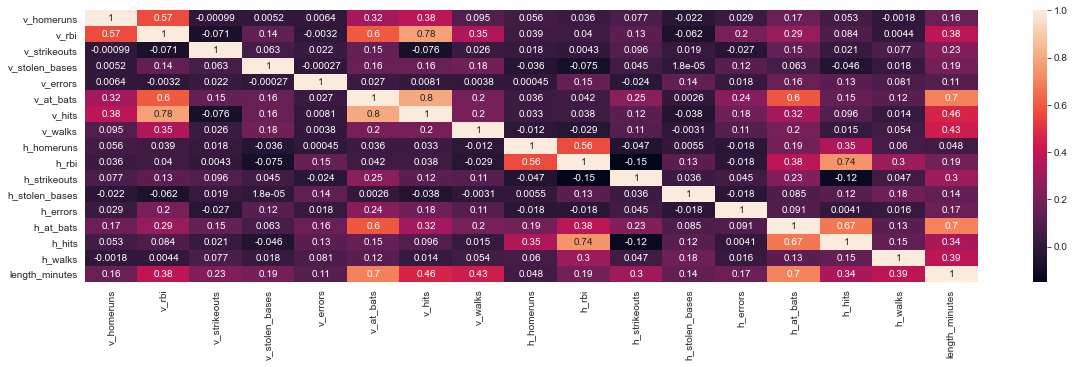

In [236]:
#Create a heatmap to show correlations (R) for all team performance variables and the length of the game in minutes
sns.heatmap(corr_game_stats_length, annot=True)

#### (4) Game Attendance

In [237]:
#Create a correlated dataframe using the df_gamelogs5 dataset
game_stats_att = df_gamelogs5[['v_homeruns','v_rbi','v_strikeouts','v_stolen_bases','v_errors',
                    'v_at_bats','v_hits','v_walks','h_homeruns','h_rbi','h_strikeouts','h_stolen_bases','h_errors',
                    'h_at_bats','h_hits','h_walks','attendance']]

corr_game_stats_att = game_stats_att.corr()

<AxesSubplot:>

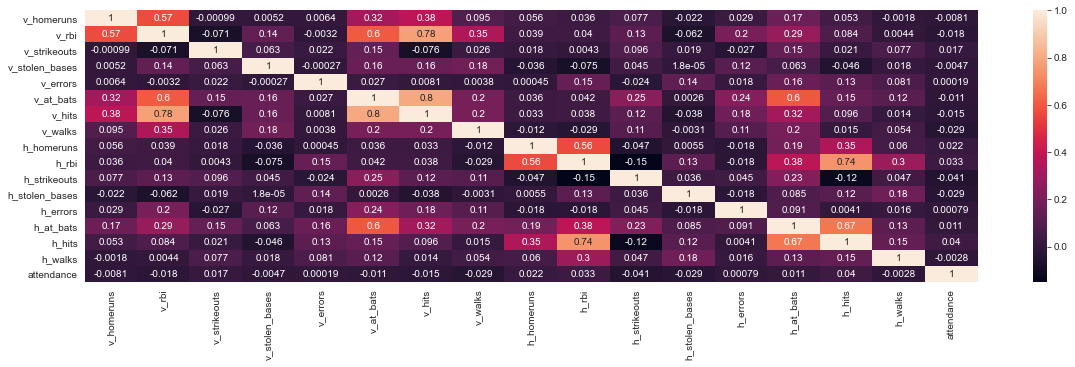

In [238]:
#Create a heatmap to show correlations (R) for all team performance variables and game attendance
sns.heatmap(corr_game_stats_att, annot=True)

## Insights

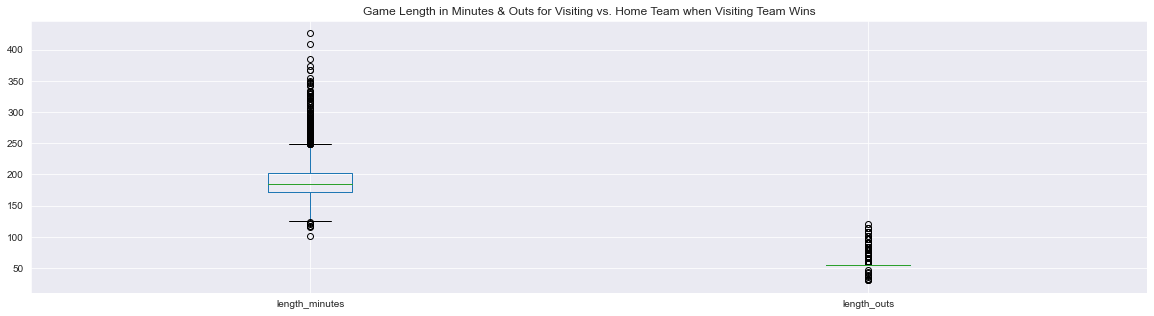

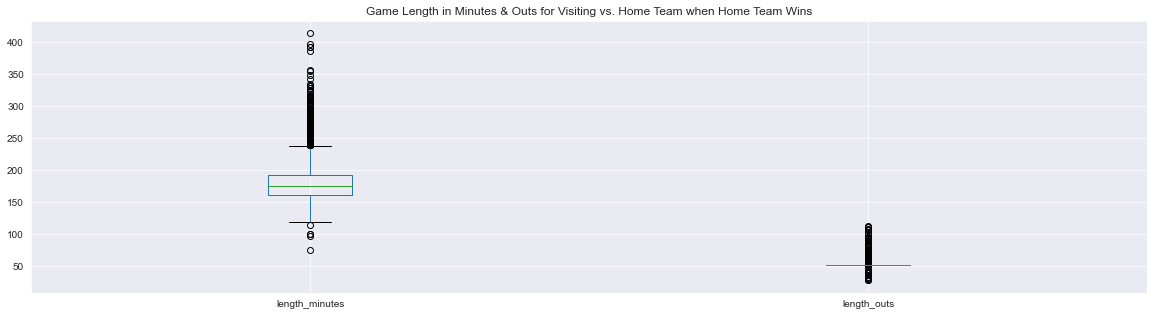

In [259]:
#Create a boxplot using df_v_wins
df_v_wins.boxplot(column=['length_minutes','length_outs'])
plt.title('Game Length in Minutes & Outs for Visiting vs. Home Team when Visiting Team Wins')
plt.show()

#Create a boxplot using df_h_wins
df_h_wins.boxplot(column=['length_minutes','length_outs'])
plt.title('Game Length in Minutes & Outs for Visiting vs. Home Team when Home Team Wins')
plt.show()

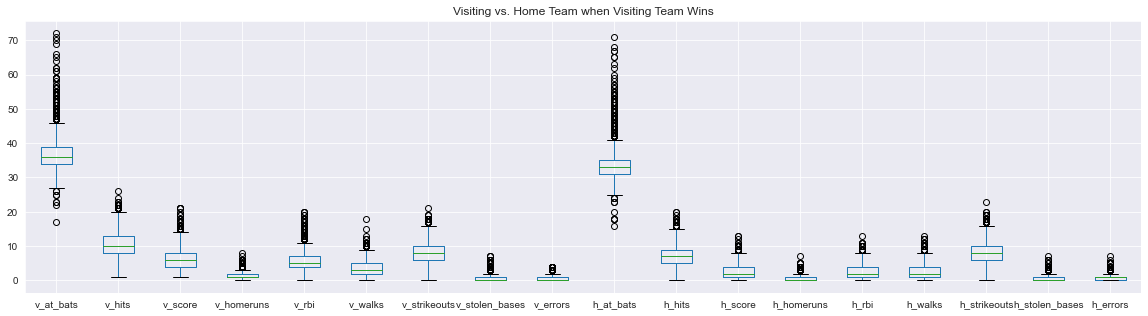

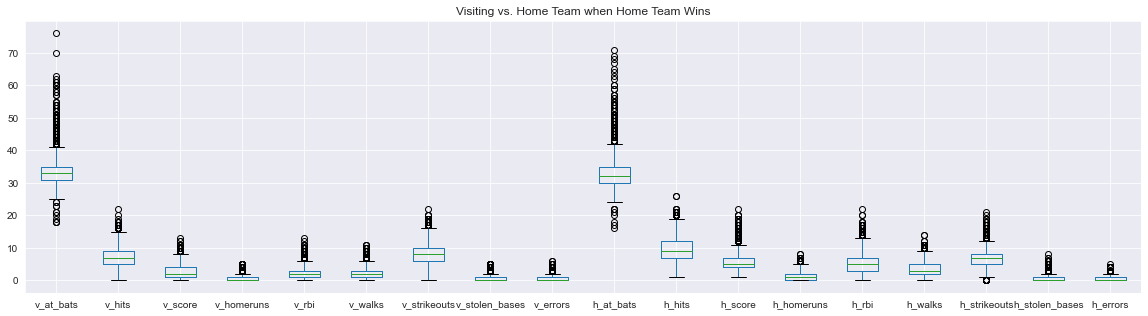

In [257]:
#Create a boxplot using df_v_wins
df_v_wins.boxplot(column=['v_at_bats','v_hits','v_score','v_homeruns','v_rbi','v_walks','v_strikeouts',
                          'v_stolen_bases','v_errors','h_at_bats','h_hits','h_score','h_homeruns','h_rbi',
                           'h_walks','h_strikeouts','h_stolen_bases','h_errors'])
plt.title('Team Statistics for Visiting vs. Home Team when Visiting Team Wins')
plt.show()

#Create a boxplot using df_h_wins
df_h_wins.boxplot(column=['v_at_bats','v_hits','v_score','v_homeruns','v_rbi','v_walks','v_strikeouts',
                          'v_stolen_bases','v_errors','h_at_bats','h_hits','h_score','h_homeruns','h_rbi',
                           'h_walks','h_strikeouts','h_stolen_bases','h_errors'])
plt.title('Team Statistics for Visiting vs. Home Team when Home Team Wins')
plt.show()

#### Insight (1) Two variables stand out when comparing the difference between visiting team wins and home team wins.

 - The first variable is Length in Minutes. The mean length of games won by the visiting team is higher (188 minutes) than that of games won by the home team (178 minutes).

 - The second variable is Score. The mean score for both teams is higher (V=6.12, H=2.66) when the visiting team wins, and lower (V=2.53, H=5.76) when the home team wins.
 
 - There are important implications for team composition and training strategies. Teams need a deep bench to be able to keep players fresh during longer games. Players need stamina (mental and physical ability to sustain an activity for a long period) and endurance (physical capability to sustain an exercise for a long period) to perform at their best when they are the visiting team.

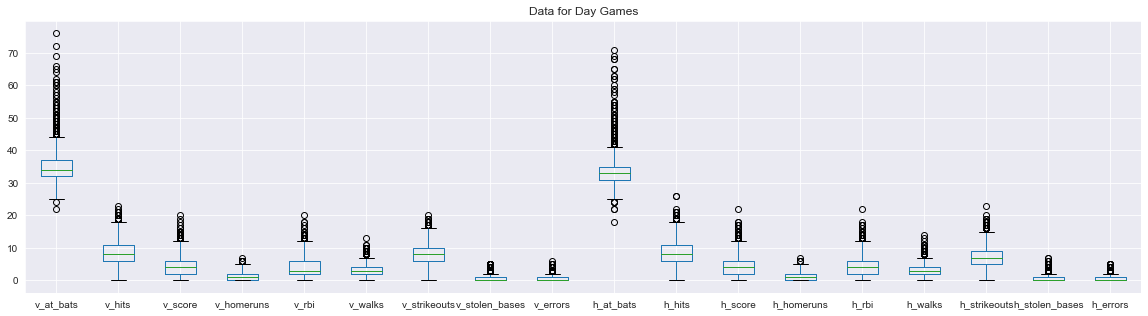

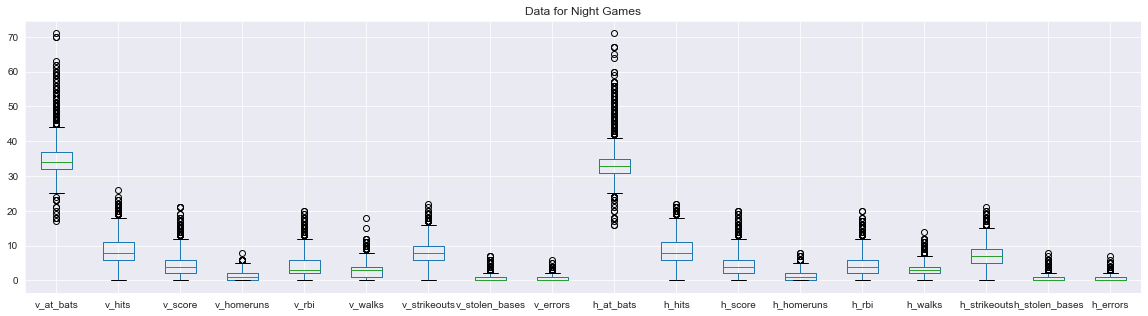

In [260]:
#Create a boxplot of the data for games that take place during the day
day_games = df_gamelogs5['day_night'] == 'D'

df_gamelogs5_day_games = df_gamelogs5[day_games]
df_gamelogs5_day_games.boxplot(column=['v_at_bats','v_hits','v_score','v_homeruns','v_rbi','v_walks','v_strikeouts',
                          'v_stolen_bases','v_errors','h_at_bats','h_hits','h_score','h_homeruns','h_rbi',
                           'h_walks','h_strikeouts','h_stolen_bases','h_errors'])
plt.title('Data for Day Games')
plt.show()

#Create a boxplot of the data for games that take place at night
night_games = df_gamelogs5['day_night'] == 'N'

df_gamelogs5_night_games = df_gamelogs5[night_games]
df_gamelogs5_night_games.boxplot(column=['v_at_bats','v_hits','v_score','v_homeruns','v_rbi','v_walks','v_strikeouts',
                          'v_stolen_bases','v_errors','h_at_bats','h_hits','h_score','h_homeruns','h_rbi',
                           'h_walks','h_strikeouts','h_stolen_bases','h_errors'])
plt.title('Data for Night Games')
plt.show()

#### Insight (2) There is no significant difference in performance between games played during the day and games played at night.

 - While we might expect that factors like temperature, wind, and sun, which can change with the time of day, would affect teams' performance, we don't see noticeable differences in the data.

<AxesSubplot:>

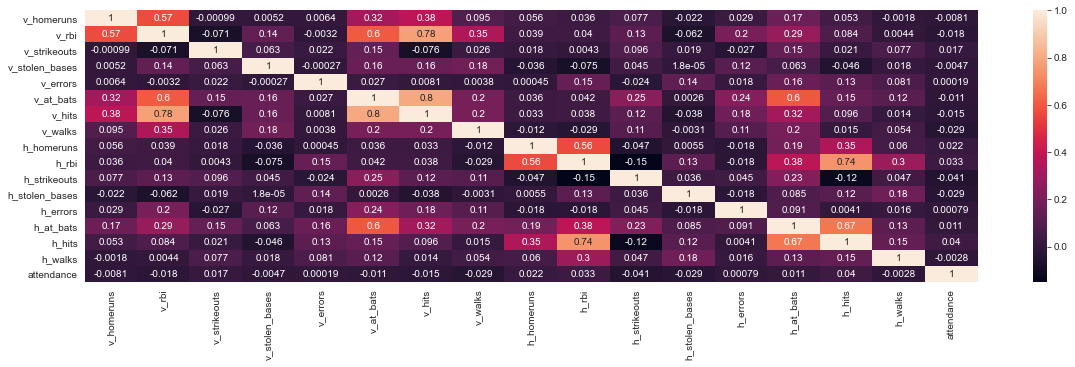

In [261]:
#Create a correlated dataframe using the df_gamelogs5 dataset
game_stats_att = df_gamelogs5[['v_homeruns','v_rbi','v_strikeouts','v_stolen_bases','v_errors',
                    'v_at_bats','v_hits','v_walks','h_homeruns','h_rbi','h_strikeouts','h_stolen_bases','h_errors',
                    'h_at_bats','h_hits','h_walks','attendance']]

corr_game_stats_att = game_stats_att.corr()

#Create a heatmap to show correlations (R) for all team performance variables and game attendance
sns.heatmap(corr_game_stats_att, annot=True)

#### Insight (3) Game attendance is not correlated with any of the team performance variables.

 - Fans, media, and players often refer to home field advantage and fan support as factors with a positive influence on the home team's performance. However, a correlation analysis shows no relationship between attendance and team performance variables.
 
 - This result suggests that team composition and cameraderie are more important than the number of spectators in attendance.

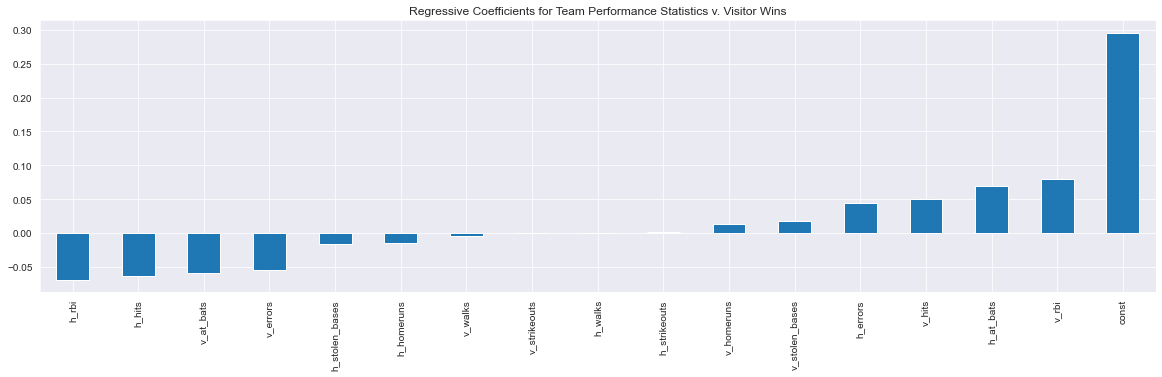

In [262]:
#Create a bar plot to identify which Coefficients react most strongly with respect to Visitor Wins
Coefficients_all.sort_values().plot(kind='bar')
plt.title('Regressive Coefficients for Team Performance Statistics v. Visitor Wins')
plt.show()

#### Insight (4) A regression model reveals that visitor Runs Batted In (RBIs) have the strongest relationship to visiting team wins, with visiting team homeruns, visiting team stolen bases, and home team errors also playing a part.

 - Away team strategy should focus on developing solid hitting performance, getting runners on base, and employing/training effective base coaches.
 
 - Teams will also benefit from studying opponents to identify their most common errors along with how to respond when the errors occur.

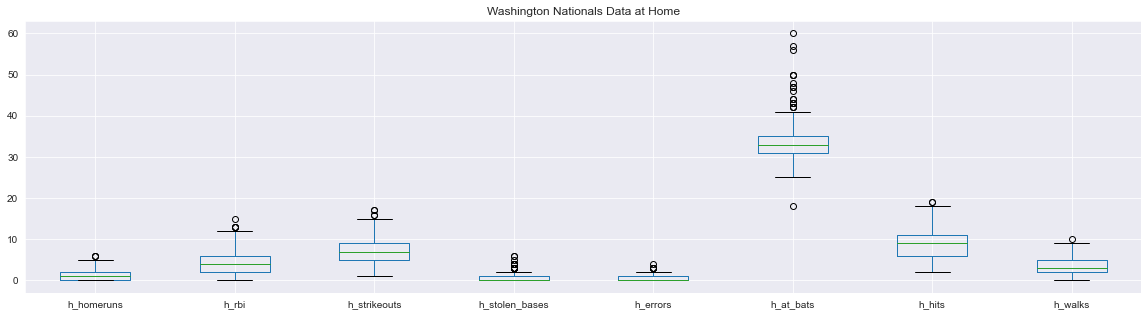

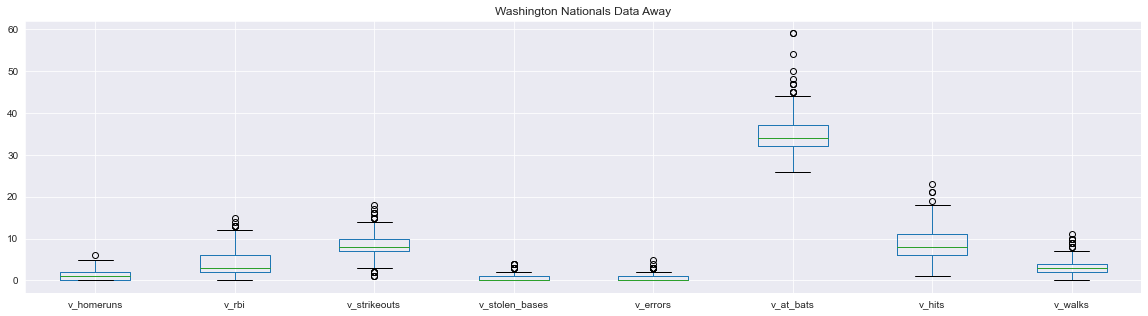

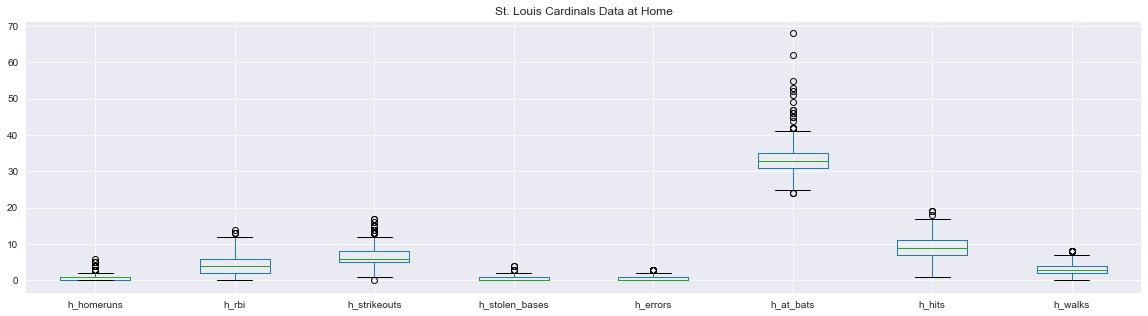

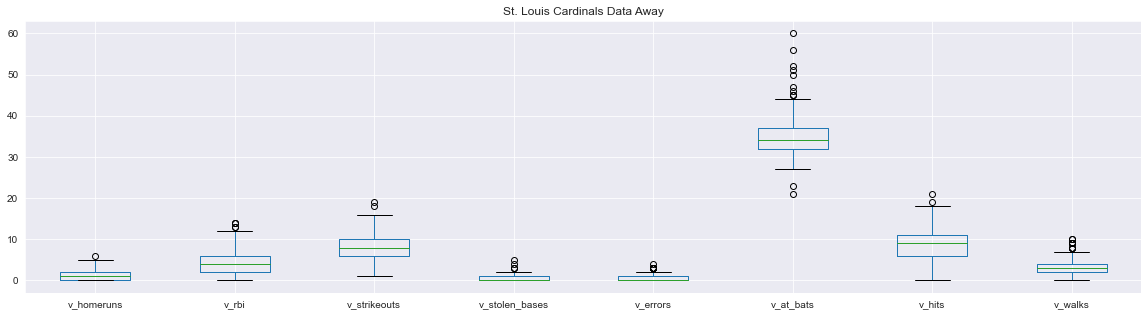

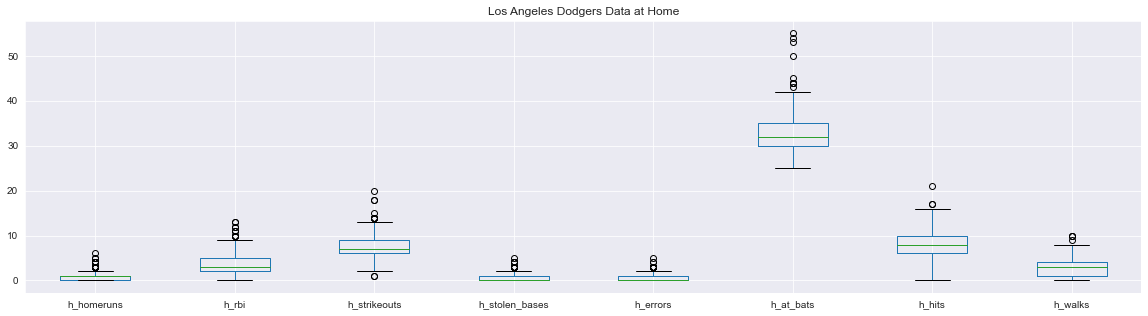

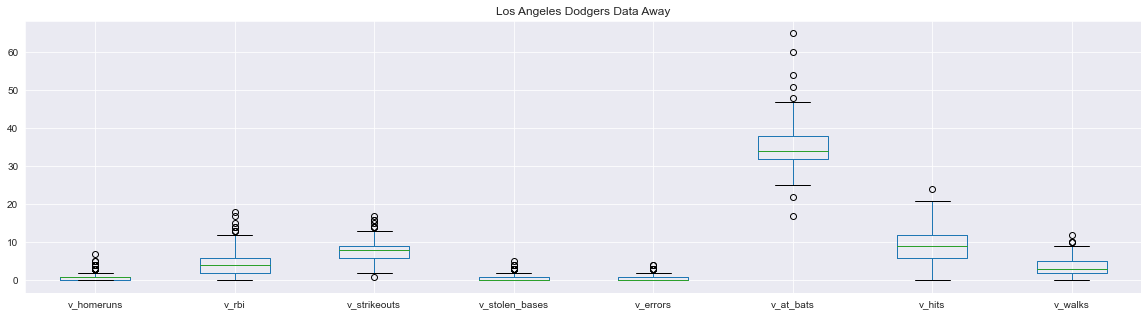

<AxesSubplot:>

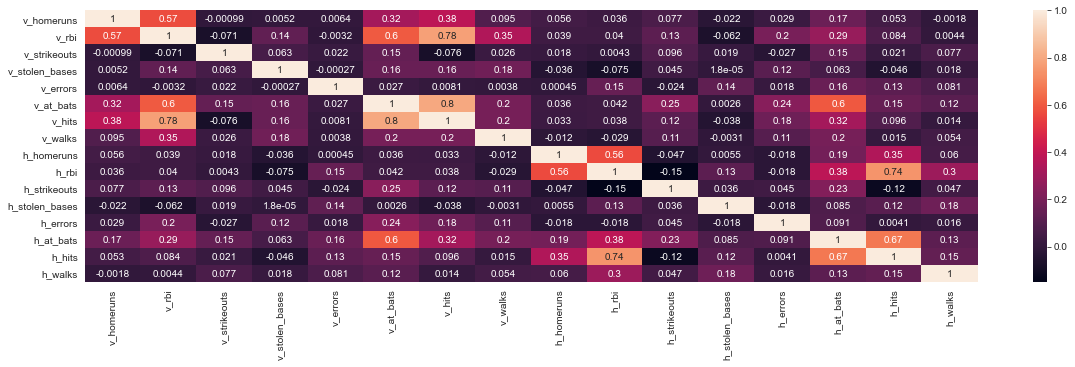

In [264]:
#Create a boxplot of the data for WAS when they are the home team
WAS_h = df_gamelogs5['h_name'] == 'WAS'

df_gamelogs5_WAS_h = df_gamelogs5[WAS_h]
df_gamelogs5_WAS_h.boxplot(column=['h_homeruns','h_rbi','h_strikeouts','h_stolen_bases','h_errors',
                    'h_at_bats','h_hits','h_walks'])
plt.title('Washington Nationals Data at Home')
plt.show()

#Create a boxplot of the data for WAS when they are the visitor team
WAS_v = df_gamelogs5['v_name'] == 'WAS'

df_gamelogs5_WAS_v = df_gamelogs5[WAS_v]
df_gamelogs5_WAS_v.boxplot(column= ['v_homeruns','v_rbi','v_strikeouts','v_stolen_bases','v_errors',
                    'v_at_bats','v_hits','v_walks'])
plt.title('Washington Nationals Data Away')
plt.show()

#Create a boxplot of the data for SLN when they are the home team
SLN_h = df_gamelogs5['h_name'] == 'SLN'

df_gamelogs5_SLN_h = df_gamelogs5[SLN_h]
df_gamelogs5_SLN_h.boxplot(column=['h_homeruns','h_rbi','h_strikeouts','h_stolen_bases','h_errors',
                    'h_at_bats','h_hits','h_walks'])
plt.title('St. Louis Cardinals Data at Home')
plt.show()

#Create a boxplot of the data for SLN when they are the visitor team
SLN_v = df_gamelogs5['v_name'] == 'SLN'

df_gamelogs5_SLN_v = df_gamelogs5[SLN_v]
df_gamelogs5_SLN_v.boxplot(column= ['v_homeruns','v_rbi','v_strikeouts','v_stolen_bases','v_errors',
                    'v_at_bats','v_hits','v_walks'])
plt.title('St. Louis Cardinals Data Away')
plt.show()

#Create a boxplot of the data for LAN when they are the home team
LAN_h = df_gamelogs5['h_name'] == 'LAN'

df_gamelogs5_LAN_h = df_gamelogs5[LAN_h]
df_gamelogs5_LAN_h.boxplot(column=['h_homeruns','h_rbi','h_strikeouts','h_stolen_bases','h_errors',
                    'h_at_bats','h_hits','h_walks'])
plt.title('Los Angeles Dodgers Data at Home')
plt.show()

#Create a boxplot of the data for SLN when they are the visitor team
LAN_v = df_gamelogs5['v_name'] == 'LAN'

df_gamelogs5_LAN_v = df_gamelogs5[LAN_v]
df_gamelogs5_LAN_v.boxplot(column= ['v_homeruns','v_rbi','v_strikeouts','v_stolen_bases','v_errors',
                    'v_at_bats','v_hits','v_walks'])
plt.title('Los Angeles Dodgers Data Away')
plt.show()

#Create a correlated dataframe using the df_gamelogs5 dataset
game_stats = df_gamelogs5[['v_homeruns','v_rbi','v_strikeouts','v_stolen_bases','v_errors',
                    'v_at_bats','v_hits','v_walks','h_homeruns','h_rbi','h_strikeouts','h_stolen_bases','h_errors',
                    'h_at_bats','h_hits','h_walks']]

corr_game_stats = game_stats.corr()

#Create a heatmap to show correlations (R) for all team performance variables using the df_gamelogs5 dataset
sns.heatmap(corr_game_stats, annot=True)

#### Insight (5) The three (3) teams with the most wins for the period 2012-2016 are the Washington Nationals, St. Louis Cardinals, and Los Angeles Dodgers.

 - Comparing performance as visiting vs. home teams shows that each team has more At Bats, Hits and Walks when winning as visitors.
 
 - A correlation analysis shows visitor At Bats are strongly correlated with visitor Hits and visitor RBIs. Visitor Walks have some correlation to visitor RBIs.
 
 - Meanwhile, home At Bats show a much weaker correlation with home Hits and home RBIs.
 
 - Home teams need to focus on defense and strikeouts so visiting teams will have fewer at bats.